In [1]:
from cymetric import timeseries as com
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import cymetric as cym
db = cym.dbopen('cyclus.sqlite')
ev = cym.Evaluator(db=db, write=False)

In [3]:
def month2year(df, mode=0, division=12):
    dfn = pd.DataFrame(columns=['Time','Mass'])
    val = 0
    for index, row in df.iterrows():
        if mode == 0:
            val = row['Mass']
        else:
            val += row['Mass']
        if row['Time'] % division == 0:
            if mode == 2:
                val *= 1./double(division)
            dfn.loc[int(row['Time'] / division)] = int(row['Time'] / 12)
            dfn.loc[int(row['Time'] / division)]['Mass'] = val
            val = 0
    return dfn
            

In [4]:
FBR_dr_trans = month2year(com.transactions(ev, receivers=['FBR_driver']), 1, 4*12)
FBR_dr_trans_LEU = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_LEU_N'] ), 1, 4*12)
FBR_dr_trans_N = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_MOX_N'] ), 1, 4*12)

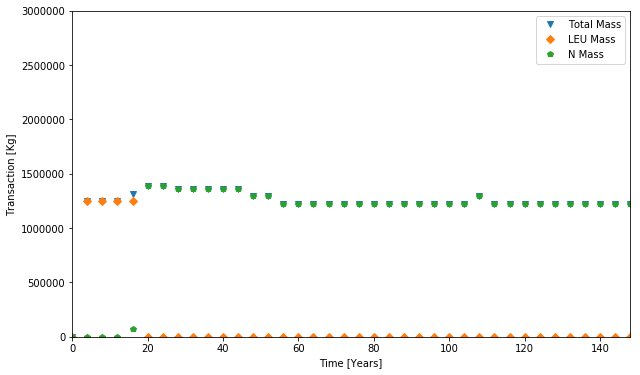

In [5]:
FBR_dr_trans_dat = pd.DataFrame({'Time': FBR_dr_trans.Time, 'Total Mass': FBR_dr_trans.Mass})
FBR_dr_trans_LEU_dat = pd.DataFrame({'Time': FBR_dr_trans_LEU.Time, 'LEU Mass': FBR_dr_trans_LEU.Mass})
FBR_dr_trans_N_dat = pd.DataFrame({'Time': FBR_dr_trans_N.Time, 'N Mass': FBR_dr_trans_N.Mass})


e1x = FBR_dr_trans_dat.plot(x='Time', y='Total Mass', figsize=(10, 6), linestyle=' ', marker='v')
FBR_dr_trans_LEU_dat.plot(x='Time', ax=e1x, marker='D', linestyle=' ')
FBR_dr_trans_N_dat.plot(x='Time', ax=e1x, marker='p', linestyle=' ')



plt.ylim([0,3000000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)
plt.legend()

In [6]:
FAB_pwr = com.transactions(ev, receivers=['FAB'], commodities=['pwr_tru_str'] )
FAB_blanket = com.transactions(ev, receivers=['FAB'], commodities=['blk_tru_str'] )

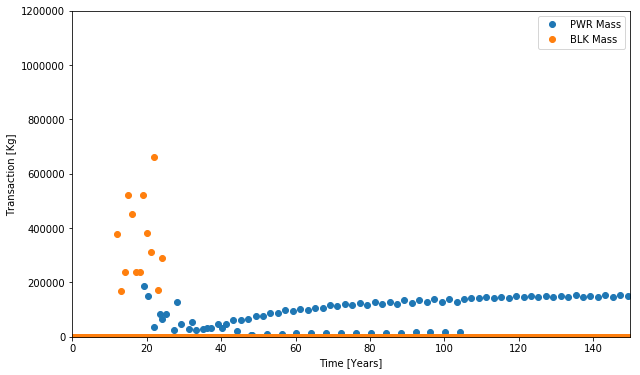

In [7]:
FAB_pwr_dat = pd.DataFrame({'Time': FAB_pwr.Time/12., 'PWR Mass': FAB_pwr.Mass})
FAB_blanket_dat = pd.DataFrame({'Time': FAB_blanket.Time/12., 'BLK Mass': FAB_blanket.Mass})


e1x = FAB_pwr_dat.plot(x='Time', y='PWR Mass', figsize=(10, 6), linestyle=' ', marker='o')
FAB_blanket_dat.plot(x='Time', y='BLK Mass', ax=e1x, marker='o', linestyle=' ')



plt.ylim([0,1200000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)
plt.legend()

In [8]:
sep_inv_str_pwr_tru = com.inventories(ev, facilities=['Storage_pwr_tru'])
sep_inv_str_blk_tru = com.inventories(ev, facilities=['Storage_blk_tru'])
sep_inv_sep = com.inventories(ev, facilities=['SEP'])

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:134: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


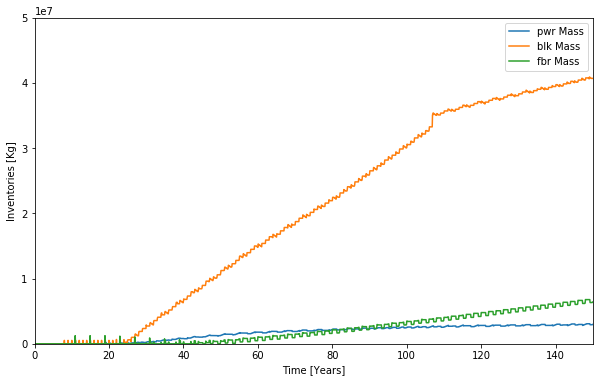

In [11]:
sep_inv_str_pwr_tru_dat = pd.DataFrame({'Time': sep_inv_str_pwr_tru.Time/12., 'pwr Mass': sep_inv_str_pwr_tru.Mass})
sep_inv_str_blk_tru_dat =  pd.DataFrame({'Time': sep_inv_str_blk_tru.Time/12., 'blk Mass': sep_inv_str_blk_tru.Mass})
sep_inv_sep_dat =  pd.DataFrame({'Time': sep_inv_sep.Time/12., 'fbr Mass': sep_inv_sep.Mass})

e1x = sep_inv_str_pwr_tru_dat.plot(x='Time', y='pwr Mass', figsize=(10, 6))
sep_inv_str_blk_tru_dat.plot(x='Time', y='blk Mass', ax=e1x)
sep_inv_sep_dat.plot(x='Time', y='fbr Mass', ax=e1x)

plt.ylim([0,50000000])
plt.xlabel('Time [Years]')
plt.ylabel('Inventories [Kg]')
plt.savefig('inv.png', dpi=326)

In [12]:
power = com.get_power(ev, facilities=['PWR', 'FBR_driver'])

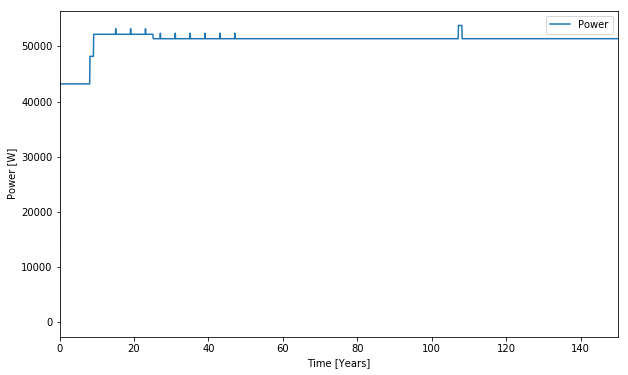

In [13]:
power_dat = pd.DataFrame({'Time': power.Time/12., 'Power': power.Value})
e1x = power_dat.plot(x='Time', y='Power', figsize=(10, 6))

#plt.ylim([0,1000000])
plt.xlabel('Time [Years]')
plt.ylabel('Power [W]')
plt.savefig('power.png', dpi=326)

In [ ]:
pwr_fab_pu = com.transactions(ev, senders=['Storage_blk_tru'], receivers=['PWR_fabrication'], nucs=['942380000','942390000','942400000','942410000','942420000'])
pwr_fab = com.transactions(ev, senders=['Storage_blk_tru'], receivers=['PWR_fabrication'])
pwr_fab_pu_frac = pwr_fab_pu
pwr_fab_pu_frac['Mass'] = pwr_fab_pu_frac['Mass'] /pwr_fab['Mass']
pwr_fab_pu_frac = pwr_fab_pu_frac.dropna()
pwr_fab_pu_frac_dat =  pd.DataFrame({'Time': pwr_fab_pu_frac.Time/12., 'Blk Pu Frac': pwr_fab_pu_frac.Mass})



e1x = pwr_fab_pu_frac_dat.plot(x='Time', y='Blk Pu Frac', figsize=(10, 6))





plt.ylim([0,0.1])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('inv.png', dpi=326)

In [ ]:
out_blk_pu = com.transactions(ev, senders=['FBR_out_blanket'], receivers=['FBR_blanket_cooling'], nucs=['942380000','942390000','942400000','942410000','942420000'])
out_blk = com.transactions(ev, senders=['FBR_out_blanket'], receivers=['FBR_blanket_cooling'])
out_blk_pu_frac = out_blk_pu
out_blk_pu_frac['Mass'] = out_blk_pu_frac['Mass'] /out_blk['Mass']
out_blk_pu_frac = out_blk_pu_frac.dropna()
out_blk_pu_frac_dat =  pd.DataFrame({'Time': out_blk_pu_frac.Time/12., 'Blk out Pu Frac': out_blk_pu_frac.Mass})

in_blk_pu = com.transactions(ev, senders=['FBR_in_blanket'], receivers=['FBR_blanket_cooling'], nucs=['942380000','942390000','942400000','942410000','942420000'])
in_blk = com.transactions(ev, senders=['FBR_in_blanket'], receivers=['FBR_blanket_cooling'])
in_blk_pu_frac = in_blk_pu
in_blk_pu_frac['Mass'] = in_blk_pu_frac['Mass'] /in_blk['Mass']
in_blk_pu_frac = in_blk_pu_frac.dropna()
in_blk_pu_frac_dat =  pd.DataFrame({'Time': in_blk_pu_frac.Time/12., 'Blk in Pu Frac': in_blk_pu_frac.Mass})



e2x = out_blk_pu_frac_dat.plot(x='Time', y='Blk out Pu Frac', figsize=(10, 6), linestyle=' ', marker='o')
in_blk_pu_frac_dat.plot(x='Time', y='Blk in Pu Frac', linestyle=' ', marker='o', ax=e2x)






plt.ylim([0.02,0.06])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('inv.png', dpi=326)

In [ ]:
retierment_blk = com.get_retirement(ev, facilities=['FBR_out_blanket','FBR_in_blanket'])
retierment_blk_dat =  pd.DataFrame({'Time': retierment_blk.Time/12., 'blk retierement': retierment_blk.Value})
e3x = retierment_blk_dat.plot(x='Time', y='blk retierement', figsize=(10, 6), linestyle=' ', marker='o')
plt.ylim([0.0,20])
plt.xlim([0.0,52.33])

plt.xlabel('Time [Years]')
plt.ylabel('Retiered facilities')
plt.savefig('inv.png', dpi=326)

In [ ]:
retierment_blk_dat

In [ ]:
com.get_transaction_df(ev, send_list=['FBR_out_blanket'], rec_list=['FBR_blanket_cooling'])

